In [ ]:
# Identify rows with empty names
# Convert name column to string and figure outnumber of names, match nan

In [ ]:
# 11% missing DOBs

In [126]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import re
from datetime import datetime, timedelta
pd.set_option('display.max_rows', None)

In [4]:
ms = [key for key in df.keys()]
ms

["September '22",
 "October '22",
 "November '22",
 "December '22",
 "January '23",
 "February '23",
 "March '23",
 "April '23",
 "May '23",
 "June '23",
 "July '23",
 "August '23",
 "September '23",
 "October '23",
 "November '23",
 "December '23"]

In [3]:
df = pd.read_excel('HE Patient Referral Spreadsheet.xlsx', sheet_name=None, index_col = None)

In [242]:
ms = [key for key in df.keys()]

In [30]:
# Loading in data

data_ = pd.read_excel('HE Patient Referral Spreadsheet.xlsx', sheet_name=["September '22", "October '22", "November '22",
                                                                         "December '22", "January '23", "February '23",
                                                                         "March '23"], index_col=None)

df = pd.read_excel('HE Patient Referral Spreadsheet.xlsx', sheet_name=ms, index_col = None)

In [239]:
ms = [key for key in df.keys()]
ms

["September '22",
 "October '22",
 "November '22",
 "December '22",
 "January '23",
 "February '23",
 "March '23"]

In [6]:
# Loading in data

dff = pd.concat(data_[frame] for frame in data_.keys())  # Reading in data
dff = dff.reset_index()   # Resetting indexes
dff = dff.drop(columns=['index'])   # Dropping old columns
dff

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,"Referred by: (211, CIS, Outreach, Brochure)",Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Utility/Housing Assist. (Y/N),Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes
0,2022-09-10 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mayra Olizette Garcia,1982-01-01 00:00:00,NaN,915-799-7191,wolyreyes@gmail.com,79904.0,NaN,N,N,N,...,Y,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN
2,Brenda L Gaytan,1982-07-14 00:00:00,NaN,915-999-2184,brendalili14@yahoo.com,79938.0,NaN,N,N,N,...,Y,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN
3,Ana Nunez,1977-10-06 00:00:00,NaN,915-691-8748,ananunez_s@yahoo.com,79927.0,NaN,N,N,N,...,Y,Y,N,Y,Michelle Armendariz,Y,sent email with resoruces for utility assistance,NaN,NaN,NaN
4,Audrey Hernandez,1991-01-07 00:00:00,NaN,915-305-6894,audrey9370@gmail.com,79915.0,NaN,N,N,Y,...,N,Y,N,N,Michelle Armendariz,N,Patient is a new resident at Centre Against Se...,NaN,NaN,NaN
5,Alba J Alvarado-Rojas,1988-07-16 00:00:00,NaN,915-694-6971,alba.janeth123@hotmail.com,79903.0,NaN,N,N,Y,...,N,N,N,N,Michelle Armendariz,N,Called patient twice and left voicemails to ob...,NaN,NaN,NaN
6,2022-09-13 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Latoya Hamilton,1977-09-24 00:00:00,NaN,915-3051304,NaN,79901.0,NaN,N,N,N,...,N,Y,N,Y,RACIA RAGIN,Y,Reffered to Medicaid Waiver for family member ...,NaN,NaN,NaN
8,2022-09-22 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Maria Flores,1960-02-26 00:00:00,NaN,915-407-4741,haznick24@yahoo.com,79927.0,NaN,N,N,N,...,Y,Y,N,N,Guadalupe Salazar,Y,sent email with resources for utility assistan...,NaN,NaN,NaN


In [9]:
# What is the shape of data

dff.columns

Index(['Name', 'D.O.B', 'Gender', 'Phone Number', 'Email', 'Zip Code',
       'Referred by: (211, CIS, Outreach, Brochure)', 'Insurance (Y/N)',
       'Primary Care Physician (Y/N)', 'Transportation (Y/N)', 'Food (Y/N)',
       'Utility/Housing Assist. (Y/N)', 'Medicaid Waiver (Y/N)', 'Other',
       'Follow-up Completed (Y/N)', 'Follow-up completed by: (Name)',
       'Was the patient connected with the agency?', 'Additional Notes',
       'Notes', 'Additional Notes ', 'Notes '],
      dtype='object')

In [10]:
# Convert names to strings

dff['Name'] = [str(name) for name in dff['Name']]

In [11]:
empty_rows = dff.loc[dff['Name'] == 'nan']   # 23 Rows that are completely empty

dff = dff.drop(index=empty_rows.index)  # Dropping empty rows

dated_rows = dff.loc[dff['Name'].str.contains('[0-9]')]   # 63 rows are dated

dff  # There are a total of 181 patients

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,"Referred by: (211, CIS, Outreach, Brochure)",Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Utility/Housing Assist. (Y/N),Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes
0,2022-09-10 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mayra Olizette Garcia,1982-01-01 00:00:00,NaN,915-799-7191,wolyreyes@gmail.com,79904.0,NaN,N,N,N,...,Y,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN
2,Brenda L Gaytan,1982-07-14 00:00:00,NaN,915-999-2184,brendalili14@yahoo.com,79938.0,NaN,N,N,N,...,Y,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN
3,Ana Nunez,1977-10-06 00:00:00,NaN,915-691-8748,ananunez_s@yahoo.com,79927.0,NaN,N,N,N,...,Y,Y,N,Y,Michelle Armendariz,Y,sent email with resoruces for utility assistance,NaN,NaN,NaN
4,Audrey Hernandez,1991-01-07 00:00:00,NaN,915-305-6894,audrey9370@gmail.com,79915.0,NaN,N,N,Y,...,N,Y,N,N,Michelle Armendariz,N,Patient is a new resident at Centre Against Se...,NaN,NaN,NaN
5,Alba J Alvarado-Rojas,1988-07-16 00:00:00,NaN,915-694-6971,alba.janeth123@hotmail.com,79903.0,NaN,N,N,Y,...,N,N,N,N,Michelle Armendariz,N,Called patient twice and left voicemails to ob...,NaN,NaN,NaN
6,2022-09-13 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Latoya Hamilton,1977-09-24 00:00:00,NaN,915-3051304,NaN,79901.0,NaN,N,N,N,...,N,Y,N,Y,RACIA RAGIN,Y,Reffered to Medicaid Waiver for family member ...,NaN,NaN,NaN
8,2022-09-22 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Maria Flores,1960-02-26 00:00:00,NaN,915-407-4741,haznick24@yahoo.com,79927.0,NaN,N,N,N,...,Y,Y,N,N,Guadalupe Salazar,Y,sent email with resources for utility assistan...,NaN,NaN,NaN


In [56]:
dff['D.O.B'].isnull().sum()   # There's a total of 20 missing inputs ---> 83 - 63(dated rows) == 20
dff['Phone Number'].isnull().sum() # There's only a total of 1 missing input ---> 64 - 63 = 1
dff['Email'].isnull().sum() # There's a total of 82 missing inputs ---> 145 - 63 = 82 
dff['Zip Code'].isnull().sum() # There's a total of 16 missing inputs ---> 79 - 63 = 16
dff['Referred by: (211, CIS, Outreach, Brochure)'].isnull().sum()  # There's a total of 8 missing inputs ---> 91 - 83 = 8
dff['Insurance (Y/N)'].isnull().sum() # There's a total of 15 missing inputs ---> 98 - 83 = 15
dff['Primary Care Physician (Y/N)'].isnull().sum() # There's a total of 26 missing values ---> 89 - 63 = 26
dff['Transportation (Y/N)'].isnull().sum() # There's a total of 29 missing values ---> 92 - 63 = 29
dff['Food (Y/N)'].isnull().sum() # There's a total of 29 missing values ---> 92 - 63 = 29
dff['Utility/Housing Assist. (Y/N)'].isnull().sum() # There's a total of 23 missing values ---> 86 - 63 = 23
dff['Medicaid Waiver (Y/N)'].isnull().sum()  # There's a total of 27 missing values ---> 90 - 63 = 27
dff['Follow-up Completed (Y/N)'].isnull().sum() # There's a total of 25 missing values ---> 98 - 63 = 25
dff['Follow-up completed by: (Name)'].isnull().sum()  # There's a total of 6 missing values ---> 69 - 63 = 6

83

In [12]:
# Converting 'NaN' for zipcode to zero then converting to integers

dff['Zip Code'] = np.where(dff['Zip Code'].isnull(), 0, dff['Zip Code'])

dff['Zip Code'] = [int(zips) for zips in dff['Zip Code']]

In [13]:
dff['Insurance (Y/N)'].unique()
dff['Insurance (Y/N)'].value_counts()  # 109 N : 37 Y

N      106
Y       35
n        2
y        2
N        1
Name: Insurance (Y/N), dtype: int64

In [83]:
dff['Primary Care Physician (Y/N)'].unique()
dff['Primary Care Physician (Y/N)'].value_counts()   # 101 N : 53 Y : 1 Dentist Only

N               96
Y               53
n                4
dentist only     1
N                1
Name: Primary Care Physician (Y/N), dtype: int64

In [87]:
dff['Transportation (Y/N)'].value_counts()  # 131 N : 21 Y

N     127
Y      21
n       3
N       1
Name: Transportation (Y/N), dtype: int64

In [88]:
dff.columns

Index(['Name', 'D.O.B', 'Gender', 'Phone Number', 'Email', 'Zip Code',
       'Referred by: (211, CIS, Outreach, Brochure)', 'Insurance (Y/N)',
       'Primary Care Physician (Y/N)', 'Transportation (Y/N)', 'Food (Y/N)',
       'Utility/Housing Assist. (Y/N)', 'Medicaid Waiver (Y/N)', 'Other',
       'Follow-up Completed (Y/N)', 'Follow-up completed by: (Name)',
       'Was the patient connected with the agency?', 'Additional Notes',
       'Notes', 'Additional Notes ', 'Notes '],
      dtype='object')

In [91]:
dff['Food (Y/N)'].value_counts()   # 120 N : 32 Y

N     117
Y      31
n       2
N       1
y       1
Name: Food (Y/N), dtype: int64

In [94]:
dff['Utility/Housing Assist. (Y/N)'].value_counts()  # 94 Y : 63 N : 1 Rental Assistance

Y                    91
N                    62
y                     3
n                     1
Rental Assistance     1
Name: Utility/Housing Assist. (Y/N), dtype: int64

In [97]:
dff['Medicaid Waiver (Y/N)'].value_counts()   # 116 N : 38 Y

N     111
Y      38
n       4
N       1
Name: Medicaid Waiver (Y/N), dtype: int64

In [99]:
### dff['Other'].value_counts() ### What's this column???

N                                           24
Y                                            4
Vaccine                                      2
Dental                                       2
Pediatrician                                 1
Immigration services                         1
Low-cost pharmaceuticals                     1
Dental & Varicose Veins Treatment            1
Education-GED and English classes            1
Mental Health for elderly                    1
Needing help with Medicaid application.      1
Rent                                         1
Clases de ingles para adultos (gratis).      1
Food Stamps                                  1
N                                            1
Utility & Rental                             1
Clothes/Shoes                                1
Vision Glasses                               1
Be Well                                      1
Medical Insurance                            1
Dental and Mental Health                     1
Cell Phone   

In [104]:
dff['Follow-up Completed (Y/N)'].value_counts()  # 126 Y : 23 N

Y                      110
N                       23
Y                        7
y                        4
FU on 11/3               1
2023-02-23 00:00:00      1
Name: Follow-up Completed (Y/N), dtype: int64

In [108]:
dff['Follow-up completed by: (Name)'].value_counts()

Michelle Armendariz                                               22
Guadalupe                                                         19
Saul                                                              18
Saul Gonzalez                                                     10
Estefania Medina                                                   9
Kristina Flores                                                    8
Racia                                                              7
Guadalupe Salazar                                                  7
Natalia Flores                                                     6
Missy Gallegos                                                     6
Michelle                                                           6
Racia Ragin                                                        5
Estefania                                                          5
Melissa                                                            5
Kristina F.                       

In [ ]:
# Name - Str
# DOB - Datetime ---> convert to int represented by year
# Gender - Keep???
# Phone Number - Str
# Email - Str
# Zip Code - Int
# Referred by - Str
# Insurance - Str
# Primary Care - Str
# Transportation - Str
# Food - Str
# Utility/Housing - Str
# Medicaid - Str
# Other --- What is this column???
# Follow up - Str
# Follow up comp. by - Str
# Was the patient connected - Str

In [19]:
dff['D.O.B'] = [pd.datetime(x) for x in dff['D.O.B']]

C:\Users\BecerraJM\AppData\Local\Temp\ipykernel_24732\772990672.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dff['D.O.B'] = [pd.datetime(x) for x in dff['D.O.B']]


TypeError: an integer is required (got type NaTType)

In [ ]:
# What is the distribution of ages?
# What are the most frequent zip codes?   # 
# What is the most frequent referred method?  #
# How many patients have insurnace?
# How many patients have PCP?
# How many patients have transportation?
# How many patients are in need of food?
# How many patients need assistance with utility/housing assistance?
# How many patients need medicaid waiver?
# What percentage of cases have completed follow-ups?
# Person completing the most cases?

# Notes evaluation?

# Histogram of ages
# Plot of Referred by

#---------------------------------------------------------------------------

# Quantities to showcase in dashboard:

# Percentage of patients that don't have insurance, 1 out of x for patients without transportation, 

In [125]:
dff['D.O.B'].value_counts()

1978-07-23 00:00:00    2
1970-08-07 00:00:00    2
1966-07-11 00:00:00    2
1984-06-03 00:00:00    2
1956-11-20 00:00:00    2
1995-03-14 00:00:00    1
1984-10-16 00:00:00    1
1985-04-11 00:00:00    1
1992-01-07 00:00:00    1
1987-05-23 00:00:00    1
0                      1
1975-04-13 00:00:00    1
1986-11-10 00:00:00    1
1962-05-26 00:00:00    1
1955-04-05 00:00:00    1
1940-09-25 00:00:00    1
1971-08-21 00:00:00    1
1964-08-29 00:00:00    1
1986-04-01 00:00:00    1
1961-09-30 00:00:00    1
1973-04-25 00:00:00    1
1966-12-17 00:00:00    1
1949-11-21 00:00:00    1
1975-02-14 00:00:00    1
1985-07-22 00:00:00    1
1970-12-19 00:00:00    1
1988-05-06 00:00:00    1
1994-06-02 00:00:00    1
1953-08-20 00:00:00    1
1963-07-31 00:00:00    1
1962-08-18 00:00:00    1
1980-06-26 00:00:00    1
1993-11-01 00:00:00    1
1973-09-26 00:00:00    1
1995-07-06 00:00:00    1
1998-05-03 00:00:00    1
1974-10-14 00:00:00    1
1932-02-22 00:00:00    1
1973-04-07 00:00:00    1
1980-01-23 00:00:00    1


In [121]:
dff['D.O.B'] = [str(dob) for dob in dff['D.O.B']]  # Converting all date of births to strings

In [122]:
dff['D.O.B'] = [year[:4] for year in dff['D.O.B']] # Slices DOB for 

In [123]:
dff['D.O.B'] = np.where(dff['D.O.B']=='NaT', 0, dff['D.O.B'])  # Converts nat and nan to 0's
dff['D.O.B'] = np.where(dff['D.O.B']=='nan', 0, dff['D.O.B'])

In [124]:
dff['D.O.B'] = [int(year) for year in dff['D.O.B']]  # Converting all strings to integers

ValueError: invalid literal for int() with base 10: '108-'

In [185]:
dff['D.O.B'] = [pd.datetime.now().year-year for year in dff['D.O.B']]

C:\Users\BecerraJM\AppData\Local\Temp\ipykernel_26260\1188147377.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dff['D.O.B'] = [pd.datetime.now().year-year for year in dff['D.O.B']]


In [120]:
dff.hist(column='D.O.B',
         figsize=(5,5),
         bins=50,
         range=(0,90))

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [119]:
dff['D.O.B']

0                      NaT
1      1982-01-01 00:00:00
2      1982-07-14 00:00:00
3      1977-10-06 00:00:00
4      1991-01-07 00:00:00
5      1988-07-16 00:00:00
6                      NaT
7      1977-09-24 00:00:00
8                      NaT
9      1960-02-26 00:00:00
10     1984-06-03 00:00:00
11     1952-08-16 00:00:00
12     1953-01-02 00:00:00
13                     NaT
15                     NaT
16     1976-09-05 00:00:00
17     1960-07-24 00:00:00
18     1977-08-29 00:00:00
19                     NaT
20     1968-07-29 00:00:00
21                     NaT
22     1953-03-21 00:00:00
23                     NaT
24     1984-06-03 00:00:00
25     1990-08-13 00:00:00
26     1962-12-09 00:00:00
27     1946-02-15 00:00:00
28                     NaT
29     1993-03-19 00:00:00
30     1985-08-27 00:00:00
31                     NaT
32     1952-04-14 00:00:00
33     1937-12-26 00:00:00
34     1950-08-08 00:00:00
35                     NaT
36     1963-01-30 00:00:00
37     1963-07-13 00:00:00
3

<AxesSubplot:xlabel='Zip Code'>

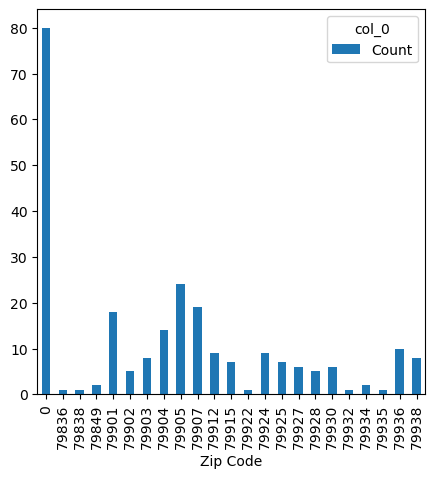

In [215]:
zip_code_tab.plot(kind='bar', figsize=(5,5))

In [21]:
dff.columns

Index(['Name', 'D.O.B', 'Gender', 'Phone Number', 'Email', 'Zip Code',
       'Referred by: (211, CIS, Outreach, Brochure)', 'Insurance (Y/N)',
       'Primary Care Physician (Y/N)', 'Transportation (Y/N)', 'Food (Y/N)',
       'Utility/Housing Assist. (Y/N)', 'Medicaid Waiver (Y/N)', 'Other',
       'Follow-up Completed (Y/N)', 'Follow-up completed by: (Name)',
       'Was the patient connected with the agency?', 'Additional Notes',
       'Notes', 'Additional Notes ', 'Notes '],
      dtype='object')

In [25]:
dff['Gender'].isnull().sum()

214

In [31]:
df

{"September '22":                      Name      D.O.B  Gender  Phone Number  \
 0     2022-09-10 00:00:00        NaT     NaN           NaN   
 1   Mayra Olizette Garcia 1982-01-01     NaN  915-799-7191   
 2         Brenda L Gaytan 1982-07-14     NaN  915-999-2184   
 3               Ana Nunez 1977-10-06     NaN  915-691-8748   
 4        Audrey Hernandez 1991-01-07     NaN  915-305-6894   
 5   Alba J Alvarado-Rojas 1988-07-16     NaN  915-694-6971   
 6     2022-09-13 00:00:00        NaT     NaN           NaN   
 7         Latoya Hamilton 1977-09-24     NaN   915-3051304   
 8     2022-09-22 00:00:00        NaT     NaN           NaN   
 9            Maria Flores 1960-02-26     NaN  915-407-4741   
 10       Abraham Villegas 1984-06-03     NaN  915-242-9389   
 11        Eduardo Barraza 1952-08-16     NaN  915-330-7292   
 12            Olga Falron 1953-01-02     NaN    9152042740   
 13    2022-09-24 00:00:00        NaT     NaN           NaN   
 14                    NaN        NaT 

In [32]:
df = pd.concat(data_[frame] for frame in data_.keys())  # Reading in data
df = df.reset_index()   # Resetting indexes
df = df.drop(columns=['index'])   # Dropping old columns
df

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,"Referred by: (211, CIS, Outreach, Brochure)",Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Utility/Housing Assist. (Y/N),Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes
0,2022-09-10 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mayra Olizette Garcia,1982-01-01 00:00:00,NaN,915-799-7191,wolyreyes@gmail.com,79904.0,NaN,N,N,N,...,Y,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN
2,Brenda L Gaytan,1982-07-14 00:00:00,NaN,915-999-2184,brendalili14@yahoo.com,79938.0,NaN,N,N,N,...,Y,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN
3,Ana Nunez,1977-10-06 00:00:00,NaN,915-691-8748,ananunez_s@yahoo.com,79927.0,NaN,N,N,N,...,Y,Y,N,Y,Michelle Armendariz,Y,sent email with resoruces for utility assistance,NaN,NaN,NaN
4,Audrey Hernandez,1991-01-07 00:00:00,NaN,915-305-6894,audrey9370@gmail.com,79915.0,NaN,N,N,Y,...,N,Y,N,N,Michelle Armendariz,N,Patient is a new resident at Centre Against Se...,NaN,NaN,NaN
5,Alba J Alvarado-Rojas,1988-07-16 00:00:00,NaN,915-694-6971,alba.janeth123@hotmail.com,79903.0,NaN,N,N,Y,...,N,N,N,N,Michelle Armendariz,N,Called patient twice and left voicemails to ob...,NaN,NaN,NaN
6,2022-09-13 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Latoya Hamilton,1977-09-24 00:00:00,NaN,915-3051304,NaN,79901.0,NaN,N,N,N,...,N,Y,N,Y,RACIA RAGIN,Y,Reffered to Medicaid Waiver for family member ...,NaN,NaN,NaN
8,2022-09-22 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Maria Flores,1960-02-26 00:00:00,NaN,915-407-4741,haznick24@yahoo.com,79927.0,NaN,N,N,N,...,Y,Y,N,N,Guadalupe Salazar,Y,sent email with resources for utility assistan...,NaN,NaN,NaN


In [33]:
df.loc[np.where((df['Gender'].isnull()) & (df['Phone Number'].notnull()))]

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,"Referred by: (211, CIS, Outreach, Brochure)",Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Utility/Housing Assist. (Y/N),Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes
1,Mayra Olizette Garcia,1982-01-01 00:00:00,NaN,915-799-7191,wolyreyes@gmail.com,79904.0,NaN,N,N,N,...,Y,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN
2,Brenda L Gaytan,1982-07-14 00:00:00,NaN,915-999-2184,brendalili14@yahoo.com,79938.0,NaN,N,N,N,...,Y,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN
3,Ana Nunez,1977-10-06 00:00:00,NaN,915-691-8748,ananunez_s@yahoo.com,79927.0,NaN,N,N,N,...,Y,Y,N,Y,Michelle Armendariz,Y,sent email with resoruces for utility assistance,NaN,NaN,NaN
4,Audrey Hernandez,1991-01-07 00:00:00,NaN,915-305-6894,audrey9370@gmail.com,79915.0,NaN,N,N,Y,...,N,Y,N,N,Michelle Armendariz,N,Patient is a new resident at Centre Against Se...,NaN,NaN,NaN
5,Alba J Alvarado-Rojas,1988-07-16 00:00:00,NaN,915-694-6971,alba.janeth123@hotmail.com,79903.0,NaN,N,N,Y,...,N,N,N,N,Michelle Armendariz,N,Called patient twice and left voicemails to ob...,NaN,NaN,NaN
7,Latoya Hamilton,1977-09-24 00:00:00,NaN,915-3051304,NaN,79901.0,NaN,N,N,N,...,N,Y,N,Y,RACIA RAGIN,Y,Reffered to Medicaid Waiver for family member ...,NaN,NaN,NaN
9,Maria Flores,1960-02-26 00:00:00,NaN,915-407-4741,haznick24@yahoo.com,79927.0,NaN,N,N,N,...,Y,Y,N,N,Guadalupe Salazar,Y,sent email with resources for utility assistan...,NaN,NaN,NaN
10,Abraham Villegas,1984-06-03 00:00:00,NaN,915-242-9389,NaN,79904.0,NaN,N,N,NaN,...,NaN,NaN,NaN,NaN,Missy Gallegos,NaN,NaN,NaN,NaN,NaN
11,Eduardo Barraza,1952-08-16 00:00:00,NaN,915-330-7292,NaN,79936.0,NaN,Y,N,N,...,N,Y,N,Y,Melissa Martinez,N,Patient stated that he did not need PCP info s...,NaN,NaN,NaN
12,Olga Falron,1953-01-02 00:00:00,NaN,9152042740,NaN,79927.0,NaN,Y,Y,N,...,N,N,N,Y,Melissa Martinez,N,Patient stated she filled out our form b/c she...,NaN,NaN,NaN


In [408]:
female = [1, 2, 3, 4, 5, 7, 9, 12, 16, 17, 20, 25, 27, 29, 33, 34, 36, 38, 41, 43, 44, 45, 51, 53, 57, 60, 62, 63, 64,
          66, 68, 69, 70, 74, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 91, 93, 94, 96, 99, 101, 104, 106, 110,
          112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 151, 153, 154,
          156, 157, 158, 161, 163, 164, 166, 167, 169, 171, 173, 175, 178, 179, 181, 182, 183, 184, 186, 189, 191, 192, 193, 194,
          195, 197, 198, 199, 202, 204, 206, 208, 214, 215, 217, 219, 220, 222, 223, 224, 226]

In [411]:
male = [10, 11, 18, 21, 22, 24, 26, 30, 32, 37, 39, 40, 42, 52, 54, 65, 67, 72, 73, 76, 90, 95, 97, 102, 108, 159, 176,
        188, 200, 210, 212, 216, 225, 262]

In [412]:
len(male_x)

34

In [48]:
df.loc[female, 'Gender'] = 'F'

In [43]:
df.loc[male, 'Gender'] = 'M'

In [49]:
df['Gender'].value_counts()

F    142
M     39
Name: Gender, dtype: int64

In [50]:
df['Gender'].isnull().sum() # 86 total empty rows

86

In [344]:
females = df.loc[df['Gender'] == 'F']

In [53]:
females['Zip Code'].value_counts()

79905.0    19
79907.0    18
79901.0    11
79904.0     9
79924.0     8
79912.0     8
79903.0     7
79936.0     7
79925.0     6
79927.0     6
79928.0     5
79938.0     5
79915.0     5
79930.0     5
79902.0     3
79934.0     2
79849.0     2
79935.0     2
79932.0     1
79838.0     1
79922.0     1
Name: Zip Code, dtype: int64

In [359]:
males = df.loc[df['Gender'] == 'M']
len(males)

39

In [55]:
males['Zip Code'].value_counts()

79901.0    7
79904.0    5
79905.0    5
79936.0    3
79938.0    3
79902.0    2
79915.0    2
79930.0    1
79907.0    1
79924.0    1
79925.0    1
79903.0    1
79836.0    1
79912.0    1
Name: Zip Code, dtype: int64

In [96]:
# Converting to datetime
males['D.O.B'] = pd.to_datetime(males['D.O.B'])

C:\Users\BecerraJM\AppData\Local\Temp\ipykernel_24732\3384969052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['D.O.B'] = pd.to_datetime(males['D.O.B'])


In [97]:
# Normalizing datetime to just obtain year/month/day
males['D.O.B'] = males['D.O.B'].dt.normalize()

C:\Users\BecerraJM\AppData\Local\Temp\ipykernel_24732\1767464178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['D.O.B'] = males['D.O.B'].dt.normalize()


In [98]:
males['D.O.B'] = males['D.O.B'].dt.floor('D')

C:\Users\BecerraJM\AppData\Local\Temp\ipykernel_24732\3638560703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['D.O.B'] = males['D.O.B'].dt.floor('D')


In [148]:
# Obtaining age represented by total amount of days
males['Age_(Years)'] = [pd.Timestamp.now().normalize()-dob for dob in males['D.O.B']]

C:\Users\BecerraJM\AppData\Local\Temp\ipykernel_24732\1412504780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['Age_(Years)'] = [pd.Timestamp.now().normalize()-dob for dob in males['D.O.B']]


In [152]:
# Lambda function to convert total days into years
males['Age_(Years)'] = males['Age_(Years)'].apply(lambda x: x/np.timedelta64(1, 'Y'))

C:\Users\BecerraJM\AppData\Local\Temp\ipykernel_24732\3311318263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['Age_(Years)'] = males['Age_(Years)'].apply(lambda x: x/np.timedelta64(1, 'Y'))


In [155]:
# Rounding off newly calculated years to 2 decimals
males['Age_(Years)'] = np.round(males['Age_(Years)'], 2)

C:\Users\BecerraJM\AppData\Local\Temp\ipykernel_24732\102404162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['Age_(Years)'] = np.round(males['Age_(Years)'], 2)


In [157]:
males.describe()

,Zip Code,Age,Age_(Years)
count,34.000000,34,34.000000
mean,79910.147059,21364 days 14:49:24.705882368,58.494706
std,18.900268,4287 days 01:09:39.487913856,11.737909
min,79836.000000,13730 days 00:00:00,37.590000
25%,79902.000000,20006 days 06:00:00,54.777500
50%,79905.000000,21724 days 00:00:00,59.475000
75%,79921.750000,23433 days 18:00:00,64.160000
max,79938.000000,31546 days 00:00:00,86.370000


In [204]:
# Function to convert DOB's into years
def convert_to_years(data):
    """Converts date of birth into years"""
    data['D.O.B'] = pd.to_datetime(data['D.O.B'])
    data['D.O.B'] = data['D.O.B'].dt.normalize()  # Normalizing timestamp to datetime
    data['Age_(Years)'] = [pd.Timestamp.now().normalize()-dob for dob in data['D.O.B']] # Subtracting DOB from today's date
    data['Age_(Years)'] = data['Age_(Years)'].apply(lambda x: x/np.timedelta64(1, 'Y'))  # Converting days provided into years
    data['Age_(Years)'] = np.round(data['Age_(Years)'], 2)   # Rounding to 2 decimals
    return data['Age_(Years)']

In [218]:
convert_to_years(females)

C:\Users\BecerraJM\AppData\Local\Temp\ipykernel_24732\1996325972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['D.O.B'] = pd.to_datetime(data['D.O.B'])
C:\Users\BecerraJM\AppData\Local\Temp\ipykernel_24732\1996325972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['D.O.B'] = data['D.O.B'].dt.normalize()  # Normalizing timestamp to datetime
C:\Users\BecerraJM\AppData\Local\Temp\ipykernel_24732\1996325972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

1      41.24
2      40.71
3      45.48
4      32.23
5      34.71
7      45.51
9      63.09
12     70.24
16     46.57
17     62.68
20     54.67
25     32.63
27     77.12
29     30.03
33     85.26
34     72.64
36     60.17
38     45.02
41       NaN
43     52.42
44     61.50
45     45.37
51     43.30
53     40.38
57     37.13
60     51.03
62       NaN
63       NaN
64       NaN
66       NaN
68       NaN
69       NaN
70       NaN
74       NaN
77     50.23
78     72.71
79     41.61
80     79.62
81     34.62
83     65.52
84     44.63
85     53.04
86     50.28
87     66.36
88     56.19
91       NaN
93       NaN
94     26.86
96     65.27
99     41.91
101    65.93
104      NaN
106    26.47
110      NaN
112    44.17
113      NaN
115    52.66
116    35.37
117    32.41
118    30.98
119    69.72
120    58.96
121    66.23
122    72.19
123    37.81
124    32.21
126    34.51
127    30.87
128    57.71
129    28.62
130    60.12
131    30.83
132    29.94
151    52.65
153    37.69
154    52.28
156    34.90

In [166]:
females['D.O.B']  #index 91 has DOB in 2079, 113 had that date? 215 had that date? 220 was calling for her son,
                  # 231 had incomplete date

1      1982-01-01 00:00:00
2      1982-07-14 00:00:00
3      1977-10-06 00:00:00
4      1991-01-07 00:00:00
5      1988-07-16 00:00:00
7      1977-09-24 00:00:00
9      1960-02-26 00:00:00
12     1953-01-02 00:00:00
16     1976-09-05 00:00:00
17     1960-07-24 00:00:00
20     1968-07-29 00:00:00
25     1990-08-13 00:00:00
27     1946-02-15 00:00:00
29     1993-03-19 00:00:00
33     1937-12-26 00:00:00
34     1950-08-08 00:00:00
36     1963-01-30 00:00:00
38     1978-03-24 00:00:00
41     2022-10-11 00:00:00
43     1970-10-30 00:00:00
44     1961-09-29 00:00:00
45     1977-11-17 00:00:00
51     1979-12-12 00:00:00
53     1982-11-12 00:00:00
57     1986-02-10 00:00:00
60     1972-03-18 00:00:00
62                     NaT
63                     NaT
64                     NaT
66                     NaT
68                     NaT
69                     NaT
70                     NaT
74                     NaT
77     1973-01-06 00:00:00
78     1950-07-15 00:00:00
79     1981-08-19 00:00:00
8

In [195]:
# Correcting incorrectly entered date
incorrect_date = df.loc[np.where(df['D.O.B'] == '108-07-1959')]
df.loc[incorrect_date.index, 'D.O.B'] = '1959-07-10'

In [201]:
# Correcting incorrectly entered date
another_wrong_date = df.loc[np.where(df['D.O.B'] == '1/16/')]
df.loc[another_wrong_date.index, 'D.O.B'] = 'NaT'

In [213]:
np.where(females['Age_(Years)'])

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,"Referred by: (211, CIS, Outreach, Brochure)",Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes,Age_(Years)
1,Mayra Olizette Garcia,1982-01-01,F,915-799-7191,wolyreyes@gmail.com,79904.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,41.24
2,Brenda L Gaytan,1982-07-14,F,915-999-2184,brendalili14@yahoo.com,79938.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,40.71
3,Ana Nunez,1977-10-06,F,915-691-8748,ananunez_s@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,Y,Michelle Armendariz,Y,sent email with resoruces for utility assistance,NaN,NaN,NaN,45.48
4,Audrey Hernandez,1991-01-07,F,915-305-6894,audrey9370@gmail.com,79915.0,NaN,N,N,Y,...,Y,N,N,Michelle Armendariz,N,Patient is a new resident at Centre Against Se...,NaN,NaN,NaN,32.23
5,Alba J Alvarado-Rojas,1988-07-16,F,915-694-6971,alba.janeth123@hotmail.com,79903.0,NaN,N,N,Y,...,N,N,N,Michelle Armendariz,N,Called patient twice and left voicemails to ob...,NaN,NaN,NaN,34.71
7,Latoya Hamilton,1977-09-24,F,915-3051304,NaN,79901.0,NaN,N,N,N,...,Y,N,Y,RACIA RAGIN,Y,Reffered to Medicaid Waiver for family member ...,NaN,NaN,NaN,45.51
9,Maria Flores,1960-02-26,F,915-407-4741,haznick24@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,N,Guadalupe Salazar,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,63.09
12,Olga Falron,1953-01-02,F,9152042740,NaN,79927.0,NaN,Y,Y,N,...,N,N,Y,Melissa Martinez,N,Patient stated she filled out our form b/c she...,NaN,NaN,NaN,70.24
16,Erika Lopez,1976-09-05,F,915-759-1974,erikalopez0307@gmail.com,79934.0,NaN,Y,N,N,...,N,NaN,Y,Natalia Flores,Y,"Patient only requested information on food, ut...",NaN,NaN,NaN,46.57
17,Priscilla Chavez,1960-07-24,F,206-999-2270,a.andrade2146@yahoo.com,NaN,NaN,Y,N,N,...,N,NaN,Y,Saul Gonzalez,Y,Patient requested information on utility assis...,NaN,NaN,NaN,62.68


In [215]:
# To replace with missing values (entries that had incorrect DOB's)
new_missing = [256, 215, 113, 91, 41]
df.loc[new_missing, 'D.O.B'] = 'NaN'

In [220]:
females.describe()

,Zip Code,Age_(Years)
count,131.000000,121.000000
mean,79913.206107,49.379174
std,16.119132,15.959394
min,79838.000000,16.230000
25%,79904.500000,37.000000
50%,79907.000000,48.360000
75%,79926.000000,61.500000
max,79938.000000,91.100000


In [236]:
# Adding finished edited gender columns to original df
df.loc[females.index, 'Age_(Years)'] = females['Age_(Years)']
df.loc[males.index, 'Age_(Years)'] = males['Age_(Years)']

In [224]:
females.columns

Index(['Name', 'D.O.B', 'Gender', 'Phone Number', 'Email', 'Zip Code',
       'Referred by: (211, CIS, Outreach, Brochure)', 'Insurance (Y/N)',
       'Primary Care Physician (Y/N)', 'Transportation (Y/N)', 'Food (Y/N)',
       'Utility/Housing Assist. (Y/N)', 'Medicaid Waiver (Y/N)', 'Other',
       'Follow-up Completed (Y/N)', 'Follow-up completed by: (Name)',
       'Was the patient connected with the agency?', 'Additional Notes',
       'Notes', 'Additional Notes ', 'Notes ', 'Age_(Years)'],
      dtype='object')

In [241]:
# Females that don't have transportation
no_transportation_f = df.loc[(df['Gender'] == 'F') & (df['Transportation (Y/N)'] == 'N')]

In [248]:
# Top zip codes for females with no transportation
no_transportation_f['Zip Code'].value_counts()

79905.0    16
79907.0    12
79912.0     7
79904.0     6
79936.0     6
79925.0     6
79927.0     6
79928.0     4
79901.0     4
79938.0     4
79930.0     4
79924.0     4
79903.0     3
79915.0     3
79934.0     2
79902.0     2
79935.0     2
79838.0     1
79849.0     1
79932.0     1
79922.0     1
Name: Zip Code, dtype: int64

In [239]:
df.loc[df['Gender'] == 'F']

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,"Referred by: (211, CIS, Outreach, Brochure)",Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes,Age_(Years)
1,Mayra Olizette Garcia,1982-01-01 00:00:00,F,915-799-7191,wolyreyes@gmail.com,79904.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,41.24
2,Brenda L Gaytan,1982-07-14 00:00:00,F,915-999-2184,brendalili14@yahoo.com,79938.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,40.71
3,Ana Nunez,1977-10-06 00:00:00,F,915-691-8748,ananunez_s@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,Y,Michelle Armendariz,Y,sent email with resoruces for utility assistance,NaN,NaN,NaN,45.48
4,Audrey Hernandez,1991-01-07 00:00:00,F,915-305-6894,audrey9370@gmail.com,79915.0,NaN,N,N,Y,...,Y,N,N,Michelle Armendariz,N,Patient is a new resident at Centre Against Se...,NaN,NaN,NaN,32.23
5,Alba J Alvarado-Rojas,1988-07-16 00:00:00,F,915-694-6971,alba.janeth123@hotmail.com,79903.0,NaN,N,N,Y,...,N,N,N,Michelle Armendariz,N,Called patient twice and left voicemails to ob...,NaN,NaN,NaN,34.71
7,Latoya Hamilton,1977-09-24 00:00:00,F,915-3051304,NaN,79901.0,NaN,N,N,N,...,Y,N,Y,RACIA RAGIN,Y,Reffered to Medicaid Waiver for family member ...,NaN,NaN,NaN,45.51
9,Maria Flores,1960-02-26 00:00:00,F,915-407-4741,haznick24@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,N,Guadalupe Salazar,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,63.09
12,Olga Falron,1953-01-02 00:00:00,F,9152042740,NaN,79927.0,NaN,Y,Y,N,...,N,N,Y,Melissa Martinez,N,Patient stated she filled out our form b/c she...,NaN,NaN,NaN,70.24
16,Erika Lopez,1976-09-05 00:00:00,F,915-759-1974,erikalopez0307@gmail.com,79934.0,NaN,Y,N,N,...,N,NaN,Y,Natalia Flores,Y,"Patient only requested information on food, ut...",NaN,NaN,NaN,46.57
17,Priscilla Chavez,1960-07-24 00:00:00,F,206-999-2270,a.andrade2146@yahoo.com,NaN,NaN,Y,N,N,...,N,NaN,Y,Saul Gonzalez,Y,Patient requested information on utility assis...,NaN,NaN,NaN,62.68


In [267]:
# Obtaining males from df
males = df.loc[df['Gender'] == 'M']
males   # Total count of 39 males
males['Zip Code'].isnull().sum()

5

In [256]:
# Males with no transportation
no_transportation_m = males.loc[males['Transportation (Y/N)'] == 'N']
no_transportation_m

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,"Referred by: (211, CIS, Outreach, Brochure)",Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes,Age_(Years)
11,Eduardo Barraza,1952-08-16 00:00:00,M,915-330-7292,NaN,79936.0,NaN,Y,N,N,...,Y,N,Y,Melissa Martinez,N,Patient stated that he did not need PCP info s...,NaN,NaN,NaN,70.62
21,Rojelio Juarez,NaT,M,915-603-2621,NaN,79904.0,NaN,N,N,N,...,N,N,NaN,NaN,NaN,"3:27 PM: Ms. Juarez, called and only wanted in...",NaN,NaN,NaN,NaN
22,Jeffe Mirshamsi,1953-03-21 00:00:00,M,915-316-1116,NaN,NaN,NaN,N,N,N,...,N,N,NaN,NaN,NaN,4:28 PM: Mr. Mirshamsi's daughter called askin...,NaN,NaN,NaN,70.03
24,Abraham Villegas,1984-06-03 00:00:00,M,915-242-9389,NaN,79904.0,NaN,Y,Y,N,...,N,NaN,Y,Missy Gallegos,NaN,NaN,NaN,Called Patient but patient was not avaliable t...,texted patient to let him know that I connecte...,38.82
26,Juan Cortez,1962-12-09 00:00:00,M,915-219-6609,NaN,79904.0,NaN,Y,Y,N,...,N,NaN,Y,Missy Gallegos,NaN,NaN,NaN,Patient was at work said he would call back,texted patient to let him know that I connecte...,60.31
30,Jose Pereya,1985-08-27 00:00:00,M,915-250-6083,jose_pereyra440@hotmail.com,79938.0,211,Y,Y,N,...,N,N,Y,Luke Lucas,NaN,NaN,NaN,"Spoke with patient, referred him to agencies f...",NaN,37.59
32,Lorenzo Mora,1952-04-14 00:00:00,M,915-544-6309,lorenzomora52@gmail.com,79901.0,Outreach,N,Y,N,...,Y,N,Y,Racia Ragin,NaN,NaN,NaN,"I contacted the patient on 10/6 LVM, Contacted...",NaN,70.96
37,Antonio Candelaria,1963-07-13 00:00:00,M,915-834-9131,NaN,79938.0,Outreach (Food Bank),N,Y,N,...,Y,NaN,Y,Kristina Flores,NaN,NaN,NaN,"3:27 PM No answer, left a VM.",10/17 12:54 PM Followed up with Mr. Candelaria...,59.72
39,Miguel Luna Reyes,1959-08-07 00:00:00,M,915-540-1641,NaN,79901.0,Outreach (Food Bank),N,Y,N,...,N,N,N,Saul Gonzalez,NaN,NaN,NaN,"10/14 10:38 AM No answer, left a VM.","10/17 12:02 PM No answer, left a VM.",63.65
40,Jose Rivas Flores,1963-12-11 00:00:00,M,915-803-6355,joseri.flo63@gmail.com,79936.0,Outreach (Food Bank),N,Y,N,...,Y,NaN,Y,Natalia Flores,NaN,NaN,NaN,10:31AM Spoke with patient to let him know oth...,NaN,59.3


In [260]:
# Total of males with no transportation
no_transportation_m['Transportation (Y/N)'].value_counts()

N    26
Name: Transportation (Y/N), dtype: int64

In [259]:
# 6 missing values for males transportation question
males['Transportation (Y/N)'].isnull().sum()

6

In [261]:
# 23 missing values for females transportation question
females['Transportation (Y/N)'].isnull().sum()

23

In [263]:
# zip code breakdown for males with no transportation
no_transportation_m['Zip Code'].value_counts()

79904.0    4
79936.0    3
79938.0    3
79901.0    3
79905.0    3
79915.0    2
79930.0    1
79924.0    1
79902.0    1
79903.0    1
79836.0    1
79912.0    1
Name: Zip Code, dtype: int64

In [268]:
df.columns

Index(['Name', 'D.O.B', 'Gender', 'Phone Number', 'Email', 'Zip Code',
       'Referred by: (211, CIS, Outreach, Brochure)', 'Insurance (Y/N)',
       'Primary Care Physician (Y/N)', 'Transportation (Y/N)', 'Food (Y/N)',
       'Utility/Housing Assist. (Y/N)', 'Medicaid Waiver (Y/N)', 'Other',
       'Follow-up Completed (Y/N)', 'Follow-up completed by: (Name)',
       'Was the patient connected with the agency?', 'Additional Notes',
       'Notes', 'Additional Notes ', 'Notes ', 'Age_(Years)'],
      dtype='object')

In [274]:
# Males without a PCP
males['Primary Care Physician (Y/N)'].value_counts()

N    23
Y    12
Name: Primary Care Physician (Y/N), dtype: int64

In [278]:
# Patients with no PCP
df['Primary Care Physician (Y/N)'].value_counts()

N               96
Y               53
n                4
dentist only     1
N                1
Name: Primary Care Physician (Y/N), dtype: int64

In [290]:
# Getting counts of zip codes for patients with no PCP
no_provider = df.loc[(df['Gender'].notnull() & (df['Primary Care Physician (Y/N)'] != 'Y'))]
no_provider['Zip Code'].value_counts()

79905.0    15
79907.0    14
79901.0    12
79904.0    10
79903.0     8
79936.0     8
79912.0     7
79924.0     7
79915.0     5
79930.0     5
79902.0     4
79925.0     4
79927.0     4
79938.0     2
79934.0     2
79932.0     1
79928.0     1
79849.0     1
79935.0     1
79838.0     1
79922.0     1
Name: Zip Code, dtype: int64

In [282]:
df.isnull().sum()

Name                                            23
D.O.B                                          106
Gender                                          86
Phone Number                                    87
Email                                          168
Zip Code                                       102
Referred by: (211, CIS, Outreach, Brochure)    114
Insurance (Y/N)                                121
Primary Care Physician (Y/N)                   112
Transportation (Y/N)                           115
Food (Y/N)                                     115
Utility/Housing Assist. (Y/N)                  109
Medicaid Waiver (Y/N)                          113
Other                                          214
Follow-up Completed (Y/N)                      121
Follow-up completed by: (Name)                  91
Was the patient connected with the agency?     255
Additional Notes                               143
Notes                                          252
Additional Notes               

In [291]:
# Females without a PCP
females.loc[females['Primary Care Physician (Y/N)']]

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,"Referred by: (211, CIS, Outreach, Brochure)",Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes,Age_(Years)
1,Mayra Olizette Garcia,1982-01-01,F,915-799-7191,wolyreyes@gmail.com,79904.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,41.24
2,Brenda L Gaytan,1982-07-14,F,915-999-2184,brendalili14@yahoo.com,79938.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,40.71
3,Ana Nunez,1977-10-06,F,915-691-8748,ananunez_s@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,Y,Michelle Armendariz,Y,sent email with resoruces for utility assistance,NaN,NaN,NaN,45.48
4,Audrey Hernandez,1991-01-07,F,915-305-6894,audrey9370@gmail.com,79915.0,NaN,N,N,Y,...,Y,N,N,Michelle Armendariz,N,Patient is a new resident at Centre Against Se...,NaN,NaN,NaN,32.23
5,Alba J Alvarado-Rojas,1988-07-16,F,915-694-6971,alba.janeth123@hotmail.com,79903.0,NaN,N,N,Y,...,N,N,N,Michelle Armendariz,N,Called patient twice and left voicemails to ob...,NaN,NaN,NaN,34.71
7,Latoya Hamilton,1977-09-24,F,915-3051304,NaN,79901.0,NaN,N,N,N,...,Y,N,Y,RACIA RAGIN,Y,Reffered to Medicaid Waiver for family member ...,NaN,NaN,NaN,45.51
9,Maria Flores,1960-02-26,F,915-407-4741,haznick24@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,N,Guadalupe Salazar,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,63.09
12,Olga Falron,1953-01-02,F,9152042740,NaN,79927.0,NaN,Y,Y,N,...,N,N,Y,Melissa Martinez,N,Patient stated she filled out our form b/c she...,NaN,NaN,NaN,70.24
16,Erika Lopez,1976-09-05,F,915-759-1974,erikalopez0307@gmail.com,79934.0,NaN,Y,N,N,...,N,NaN,Y,Natalia Flores,Y,"Patient only requested information on food, ut...",NaN,NaN,NaN,46.57
17,Priscilla Chavez,1960-07-24,F,206-999-2270,a.andrade2146@yahoo.com,NaN,NaN,Y,N,N,...,N,NaN,Y,Saul Gonzalez,Y,Patient requested information on utility assis...,NaN,NaN,NaN,62.68


In [293]:
# distribution of answers for PCP question asked to females
females['Primary Care Physician (Y/N)'].value_counts()

N               73
Y               41
n                4
dentist only     1
N                1
Name: Primary Care Physician (Y/N), dtype: int64

In [295]:
# df of females with no PCP
female_no_pcp = females.loc[(females['Primary Care Physician (Y/N)'] != 'Y') & (females['Gender'].notnull())]

In [296]:
# missing items from females with no PCP df
female_no_pcp['Primary Care Physician (Y/N)'].isnull().sum()

22

In [297]:
# distribution of zip codes for females with no PCP
female_no_pcp

79907.0    13
79905.0    11
79901.0     8
79903.0     7
79904.0     7
79912.0     6
79936.0     6
79924.0     6
79925.0     4
79927.0     4
79930.0     4
79915.0     3
79934.0     2
79938.0     2
79902.0     2
79928.0     1
79932.0     1
79849.0     1
79935.0     1
79838.0     1
79922.0     1
Name: Zip Code, dtype: int64

In [298]:
# Missing entries for PCP question posed to men
males['Primary Care Physician (Y/N)'].isnull().sum()

4

In [299]:
# distribution of answers for PCP question posed to men
males['Primary Care Physician (Y/N)'].value_counts()

N    23
Y    12
Name: Primary Care Physician (Y/N), dtype: int64

In [300]:
# df of men with no PCP
no_pcp_males = males.loc[males['Primary Care Physician (Y/N)'] == 'N']

In [301]:
# distribution of zip codes for men with no PCP
no_pcp_males['Zip Code'].value_counts()

79905.0    4
79904.0    3
79901.0    3
79936.0    2
79902.0    2
79915.0    2
79930.0    1
79924.0    1
79903.0    1
79912.0    1
Name: Zip Code, dtype: int64

In [305]:
# renaming df column
df = df.rename(columns={'Referred by: (211, CIS, Outreach, Brochure)': 'Referred by'})

In [313]:
# missing female entries
females['Referred by: (211, CIS, Outreach, Brochure)'].isnull().sum()

20

In [315]:
# missing male entries
males['Referred by: (211, CIS, Outreach, Brochure)'].isnull().sum()

8

In [316]:
# distribution of referral methods for males
males['Referred by: (211, CIS, Outreach, Brochure)'].value_counts()

211                                  8
Outreach                             8
Outreach (Food Bank)                 4
Email                                2
HOME Event                           2
Outreach                             1
RotaCare Outreach                    1
Brochure                             1
Alamito Terrace HOME Office Hours    1
Blue Flame Housing                   1
DeWetter Housing                     1
Sun Plaza Housing                    1
Name: Referred by: (211, CIS, Outreach, Brochure), dtype: int64

In [345]:
# What's the average age of female at outreach events?
females['Referred by'].value_counts()

Outreach                                     52
211                                          20
DeWetter Housing                              7
Outreach (Food Bank)                          4
UTEP                                          4
RotaCare Outreach                             3
Sandoval Housing                              3
Moye Elementary                               2
Esperanza Moreno Library                      2
Outreach                                      2
Marmolejo Housing                             2
Chelsea Housing                               2
Outreach: Love, Health and Wellness Event     1
EP Water                                      1
Brochure                                      1
Kennedy HOME Office Hours                     1
Referred                                      1
Headstart School                              1
Rotacare Clinic                               1
San Jose Moscati Medical Home                 1
Richard Burges Library Event            

In [332]:
# Identifying indexes
np.where(females['Referred by: (211, CIS, Outreach, Brochure)'] == 'Richard Burges Library Event')

(array([90], dtype=int64),)

In [333]:
# Changing indexes of outreach events specified as other event
to_change_to_outreach_female = [16, 17, 18, 19, 20, 21, 76, 77, 78, 41, 48, 94, 43, 24, 23, 15, 141, 50, 90]

In [343]:
# Continutation of step above
df.loc[to_change_to_outreach_female, 'Referred by'] = 'Outreach'

In [342]:
to_change_to_outreach_female

[16, 17, 18, 19, 20, 21, 76, 77, 78, 41, 48, 94, 43, 24, 23, 15, 141, 50, 90]

In [346]:
# df of females attending outreach
outreach_females = females.loc[females['Referred by'] == 'Outreach']

In [358]:
#11 ages were missing 41 were valid
outreach_females['Age_(Years)'].mean()

52.34243902439023

In [352]:
females   #776.66 year total / 17 valid entreis     #2,145.94 / 41 valid entries for other outreach females

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,Referred by,Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes,Age_(Years)
1,Mayra Olizette Garcia,1982-01-01 00:00:00,F,915-799-7191,wolyreyes@gmail.com,79904.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,41.24
2,Brenda L Gaytan,1982-07-14 00:00:00,F,915-999-2184,brendalili14@yahoo.com,79938.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,40.71
3,Ana Nunez,1977-10-06 00:00:00,F,915-691-8748,ananunez_s@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,Y,Michelle Armendariz,Y,sent email with resoruces for utility assistance,NaN,NaN,NaN,45.48
4,Audrey Hernandez,1991-01-07 00:00:00,F,915-305-6894,audrey9370@gmail.com,79915.0,NaN,N,N,Y,...,Y,N,N,Michelle Armendariz,N,Patient is a new resident at Centre Against Se...,NaN,NaN,NaN,32.23
5,Alba J Alvarado-Rojas,1988-07-16 00:00:00,F,915-694-6971,alba.janeth123@hotmail.com,79903.0,NaN,N,N,Y,...,N,N,N,Michelle Armendariz,N,Called patient twice and left voicemails to ob...,NaN,NaN,NaN,34.71
7,Latoya Hamilton,1977-09-24 00:00:00,F,915-3051304,NaN,79901.0,NaN,N,N,N,...,Y,N,Y,RACIA RAGIN,Y,Reffered to Medicaid Waiver for family member ...,NaN,NaN,NaN,45.51
9,Maria Flores,1960-02-26 00:00:00,F,915-407-4741,haznick24@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,N,Guadalupe Salazar,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,63.09
12,Olga Falron,1953-01-02 00:00:00,F,9152042740,NaN,79927.0,NaN,Y,Y,N,...,N,N,Y,Melissa Martinez,N,Patient stated she filled out our form b/c she...,NaN,NaN,NaN,70.24
16,Erika Lopez,1976-09-05 00:00:00,F,915-759-1974,erikalopez0307@gmail.com,79934.0,Outreach,Y,N,N,...,N,NaN,Y,Natalia Flores,Y,"Patient only requested information on food, ut...",NaN,NaN,NaN,46.57
17,Priscilla Chavez,1960-07-24 00:00:00,F,206-999-2270,a.andrade2146@yahoo.com,NaN,Outreach,Y,N,N,...,N,NaN,Y,Saul Gonzalez,Y,Patient requested information on utility assis...,NaN,NaN,NaN,62.68


In [360]:
males['Referred by'].value_counts()

Outreach                             12
211                                   8
Outreach (Food Bank)                  4
HOME Event                            2
Outreach                              1
Email                                 1
RotaCare Outreach                     1
Brochure                              1
Alamito Terrace HOME Office Hours     1
Blue Flame Housing                    1
DeWetter Housing                      1
Sun Plaza Housing                     1
Name: Referred by, dtype: int64

In [361]:
males #454.38 total / 8 (other outreach events)   ...    449.68 / 8 

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,Referred by,Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes,Age_(Years)
10,Abraham Villegas,1984-06-03 00:00:00,M,915-242-9389,NaN,79904.0,NaN,N,N,NaN,...,NaN,NaN,NaN,Missy Gallegos,NaN,NaN,NaN,NaN,NaN,38.82
11,Eduardo Barraza,1952-08-16 00:00:00,M,915-330-7292,NaN,79936.0,NaN,Y,N,N,...,Y,N,Y,Melissa Martinez,N,Patient stated that he did not need PCP info s...,NaN,NaN,NaN,70.62
18,Rodney Williams,1977-08-29 00:00:00,M,915-867-4735,rw5478915@gmail.com,79901.0,Outreach,N,N,Y,...,N,N,Y,Michelle Armendariz,y,Emailed information to obtain medical insuranc...,NaN,NaN,NaN,45.59
21,Rojelio Juarez,NaT,M,915-603-2621,NaN,79904.0,Outreach,N,N,N,...,N,N,NaN,NaN,NaN,"3:27 PM: Ms. Juarez, called and only wanted in...",NaN,NaN,NaN,NaN
22,Jeffe Mirshamsi,1953-03-21 00:00:00,M,915-316-1116,NaN,NaN,NaN,N,N,N,...,N,N,NaN,NaN,NaN,4:28 PM: Mr. Mirshamsi's daughter called askin...,NaN,NaN,NaN,70.03
24,Abraham Villegas,1984-06-03 00:00:00,M,915-242-9389,NaN,79904.0,Outreach,Y,Y,N,...,N,NaN,Y,Missy Gallegos,NaN,NaN,NaN,Called Patient but patient was not avaliable t...,texted patient to let him know that I connecte...,38.82
26,Juan Cortez,1962-12-09 00:00:00,M,915-219-6609,NaN,79904.0,NaN,Y,Y,N,...,N,NaN,Y,Missy Gallegos,NaN,NaN,NaN,Patient was at work said he would call back,texted patient to let him know that I connecte...,60.31
30,Jose Pereya,1985-08-27 00:00:00,M,915-250-6083,jose_pereyra440@hotmail.com,79938.0,211,Y,Y,N,...,N,N,Y,Luke Lucas,NaN,NaN,NaN,"Spoke with patient, referred him to agencies f...",NaN,37.59
32,Lorenzo Mora,1952-04-14 00:00:00,M,915-544-6309,lorenzomora52@gmail.com,79901.0,Outreach,N,Y,N,...,Y,N,Y,Racia Ragin,NaN,NaN,NaN,"I contacted the patient on 10/6 LVM, Contacted...",NaN,70.96
37,Antonio Candelaria,1963-07-13 00:00:00,M,915-834-9131,NaN,79938.0,Outreach (Food Bank),N,Y,N,...,Y,NaN,Y,Kristina Flores,NaN,NaN,NaN,"3:27 PM No answer, left a VM.",10/17 12:54 PM Followed up with Mr. Candelaria...,59.72


In [363]:
# obtaining males at outreach events
males_outreach = males.loc[males['Referred by'] == 'Outreach']

In [369]:
# Average age of male attending outreach event
males_outreach['Age_(Years)'].mean()

56.21125000000001

In [377]:
# distribution of answers to Food assistance question
df['Food (Y/N)'].value_counts()

N     117
Y      31
n       2
N       1
y       1
Name: Food (Y/N), dtype: int64

In [388]:
# Distribution of zip codes for females needing food assistance
no_food_females = females.loc[females['Food (Y/N)'] != 'Y']
no_food_females['Zip Code'].value_counts()

79905.0    14
79907.0    14
79901.0    11
79904.0     7
79924.0     6
79936.0     6
79925.0     6
79927.0     6
79928.0     5
79912.0     5
79938.0     5
79903.0     5
79930.0     5
79915.0     4
79902.0     3
79849.0     2
79935.0     2
79932.0     1
79934.0     1
79838.0     1
79922.0     1
Name: Zip Code, dtype: int64

In [398]:
# Average age of female in need of food assistance
no_food_females['Age_(Years)'].isnull().sum()

20

In [392]:
# df of females not needing food assistance
yes_food_females = females.loc[(females['Food (Y/N)'] == 'Y') | (females['Food (Y/N)'] == 'y')]

In [397]:
# Distribution of zip codes for females not needing food assistance
yes_food_females['Zip Code'].value_counts()

79905.0    5
79907.0    4
79912.0    3
79903.0    2
79904.0    2
79924.0    2
79934.0    1
79901.0    1
79936.0    1
79915.0    1
Name: Zip Code, dtype: int64

In [400]:
# distribution of food assistance question posed to men
males['Food (Y/N)'].value_counts()

N    24
Y     9
Name: Food (Y/N), dtype: int64

In [401]:
# df of males needing food assistance
no_food_m = males.loc[males['Food (Y/N)'] == 'N']

In [402]:
# distribution of zip codes for men needing food assistance
no_food_m['Zip Code'].value_counts()

79904.0    4
79905.0    4
79901.0    3
79938.0    2
79936.0    2
79915.0    2
79930.0    1
79924.0    1
79902.0    1
79903.0    1
79836.0    1
79912.0    1
Name: Zip Code, dtype: int64

In [405]:
# average age of male needing food assistance
no_food_m['Age_(Years)'].mean()

59.05608695652174

In [407]:
# breakdown of gender
df['Gender'].value_counts()

F    142
M     39
Name: Gender, dtype: int64

In [417]:
females.loc[females['Age_(Years)'] < 30]

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,Referred by,Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes,Age_(Years)
94,Delilah M. Garcia,1996-05-19 00:00:00,F,915-478-8132,Melodycx123@gmail.com,79925.0,Outreach,N,Y,N,...,N,N,N,Racia Ragin,NaN,Sent resource guide for primary care did not n...,NaN,NaN,NaN,26.86
106,Guadalupe Aguirre,1996-10-09 00:00:00,F,(915) 990-4049,NaN,79903.0,Head Start,N,N,N,...,N,Food Stamps,Y,Saul Gonzalez,NaN,12/05 2:44 PM Patient called because she was r...,12/06 2:54 PM Contacted patient to give inform...,NaN,NaN,26.47
129,Pamela Ortiz,1994-08-17 00:00:00,F,915-266-7060,pameliukxs@gmail.com,79901.0,Outreach,N,Y,Y,...,N,NaN,Y,Michelle Armendariz,NaN,12/21/2022 -Called patient - Emailed Natalia F...,NaN,NaN,NaN,28.62
132,Eleazar Mayo,1993-04-22 00:00:00,F,915-703-9660,eleazarmayo7@gmail.com,79902.0,Outreach,Y,Y,N,...,N,N,Y,Jesus G Garcia,NaN,"12/21/2022 10:29 AM. Called, no answer. Voicem...",NaN,NaN,NaN,29.94
157,Cystal Martinez,1994-06-02 00:00:00,F,210-983-5021,crystalamartinez94@gmail.com,79907.0,RotaCare Outreach,N,Y,N,...,Y,NaN,Y,Guadalupe,NaN,"01/17/2023 - Called Mrs. Martinez, she did not...",NaN,NaN,NaN,28.83
166,Crystal Luna,1993-11-01 00:00:00,F,915-315-3557,crystalluna620@gmail.com,79904.0,211,N,N,N,...,N,NaN,Y,Racia,NaN,1/25/2023 Spoke with Crystal about utility ass...,NaN,NaN,NaN,29.41
169,Thabata Fajardo,1995-07-06 00:00:00,F,915-526-8001,tabilove67@yahoo.com,79925.0,211,N,N,N,...,N,NaN,Y,Saul,NaN,NaN,NaN,NaN,NaN,27.73
171,Vanessa Torres,1998-05-03 00:00:00,F,915-710-3286,leebarbievane6@gmail.com,79905.0,211,Y,Y,N,...,N,Pediatrician,Y,Nat,NaN,NaN,NaN,NaN,NaN,24.91
193,Haidee Harris,1995-03-14 00:00:00,F,915-305-7620,yadira.harris2498@hotmail.com,79904.0,Moye Elementary,Y,N,N,...,N,NaN,Y,Michelle,NaN,02/17/2023 - Form filled out during a Parent M...,2/20/23 - Left message for Tania/Made contact ...,NaN,NaN,28.05
220,Natanael Hernandez,2007-01-07 00:00:00,F,915-496-5082,domiklaudia81@yahoo.com,79925.0,Brochure,Y,Y,N,...,N,NaN,Y,Saul,NaN,"02/28/2023 03:33 PM Spoke to patient's mother,...",NaN,NaN,NaN,16.23


In [427]:
# Age range breakdown
df.loc[df['Age_(Years)'] < 91]

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,Referred by,Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes,Age_(Years)
1,Mayra Olizette Garcia,1982-01-01 00:00:00,F,915-799-7191,wolyreyes@gmail.com,79904.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,41.24
2,Brenda L Gaytan,1982-07-14 00:00:00,F,915-999-2184,brendalili14@yahoo.com,79938.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,40.71
3,Ana Nunez,1977-10-06 00:00:00,F,915-691-8748,ananunez_s@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,Y,Michelle Armendariz,Y,sent email with resoruces for utility assistance,NaN,NaN,NaN,45.48
4,Audrey Hernandez,1991-01-07 00:00:00,F,915-305-6894,audrey9370@gmail.com,79915.0,NaN,N,N,Y,...,Y,N,N,Michelle Armendariz,N,Patient is a new resident at Centre Against Se...,NaN,NaN,NaN,32.23
5,Alba J Alvarado-Rojas,1988-07-16 00:00:00,F,915-694-6971,alba.janeth123@hotmail.com,79903.0,NaN,N,N,Y,...,N,N,N,Michelle Armendariz,N,Called patient twice and left voicemails to ob...,NaN,NaN,NaN,34.71
7,Latoya Hamilton,1977-09-24 00:00:00,F,915-3051304,NaN,79901.0,NaN,N,N,N,...,Y,N,Y,RACIA RAGIN,Y,Reffered to Medicaid Waiver for family member ...,NaN,NaN,NaN,45.51
9,Maria Flores,1960-02-26 00:00:00,F,915-407-4741,haznick24@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,N,Guadalupe Salazar,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,63.09
10,Abraham Villegas,1984-06-03 00:00:00,M,915-242-9389,NaN,79904.0,NaN,N,N,NaN,...,NaN,NaN,NaN,Missy Gallegos,NaN,NaN,NaN,NaN,NaN,38.82
11,Eduardo Barraza,1952-08-16 00:00:00,M,915-330-7292,NaN,79936.0,NaN,Y,N,N,...,Y,N,Y,Melissa Martinez,N,Patient stated that he did not need PCP info s...,NaN,NaN,NaN,70.62
12,Olga Falron,1953-01-02 00:00:00,F,9152042740,NaN,79927.0,NaN,Y,Y,N,...,N,N,Y,Melissa Martinez,N,Patient stated she filled out our form b/c she...,NaN,NaN,NaN,70.24


In [429]:
# Distribution of zip codes for all patients
df['Zip Code'].value_counts()

79905.0    24
79907.0    19
79901.0    18
79904.0    14
79936.0    10
79924.0     9
79912.0     9
79903.0     8
79938.0     8
79925.0     7
79915.0     7
79930.0     6
79927.0     6
79928.0     5
79902.0     5
79934.0     2
79849.0     2
79935.0     2
79932.0     1
79836.0     1
79838.0     1
79922.0     1
Name: Zip Code, dtype: int64

In [430]:
len(df['Zip Code'])

267

In [438]:
# Insurance breakdown
df['Insurance (Y/N)'].value_counts()

N      106
Y       35
n        2
y        2
N        1
Name: Insurance (Y/N), dtype: int64

In [439]:
# total patients with no insurance
no_insurance = df.loc[df['Insurance (Y/N)'] == 'N']

In [466]:
# Average age of patient with no insurance
no_insurance['Age_(Years)'].mean()

50.671489361702115

In [445]:
# Missing values for insurance for females
females['Insurance (Y/N)'].value_counts()

N      82
Y      26
n       2
y       2
N       1
Name: Insurance (Y/N), dtype: int64

In [446]:
# zip code distribution for females with no insurance
no_ins_f = females.loc[females['Insurance (Y/N)'] == 'N']

In [448]:
# zip code distribution of females with no insurance
no_ins_f['Zip Code'].value_counts()

79905.0    14
79907.0    10
79927.0     5
79903.0     5
79901.0     5
79912.0     5
79925.0     5
79936.0     5
79904.0     4
79924.0     4
79930.0     4
79915.0     3
79928.0     2
79935.0     1
79838.0     1
79849.0     1
79902.0     1
79938.0     1
79932.0     1
79934.0     1
79922.0     1
Name: Zip Code, dtype: int64

In [451]:
# Mean of age for female with no insurance
no_ins_f['Age_(Years)'].mean()

47.54732394366197

In [454]:
# Males with no insurance
no_ins_m = males.loc[males['Insurance (Y/N)'] == 'N']
no_ins_m

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,Referred by,Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes,Age_(Years)
10,Abraham Villegas,1984-06-03 00:00:00,M,915-242-9389,NaN,79904.0,NaN,N,N,NaN,...,NaN,NaN,NaN,Missy Gallegos,NaN,NaN,NaN,NaN,NaN,38.82
18,Rodney Williams,1977-08-29 00:00:00,M,915-867-4735,rw5478915@gmail.com,79901.0,Outreach,N,N,Y,...,N,N,Y,Michelle Armendariz,y,Emailed information to obtain medical insuranc...,NaN,NaN,NaN,45.59
21,Rojelio Juarez,NaT,M,915-603-2621,NaN,79904.0,Outreach,N,N,N,...,N,N,NaN,NaN,NaN,"3:27 PM: Ms. Juarez, called and only wanted in...",NaN,NaN,NaN,NaN
22,Jeffe Mirshamsi,1953-03-21 00:00:00,M,915-316-1116,NaN,NaN,NaN,N,N,N,...,N,N,NaN,NaN,NaN,4:28 PM: Mr. Mirshamsi's daughter called askin...,NaN,NaN,NaN,70.03
32,Lorenzo Mora,1952-04-14 00:00:00,M,915-544-6309,lorenzomora52@gmail.com,79901.0,Outreach,N,Y,N,...,Y,N,Y,Racia Ragin,NaN,NaN,NaN,"I contacted the patient on 10/6 LVM, Contacted...",NaN,70.96
37,Antonio Candelaria,1963-07-13 00:00:00,M,915-834-9131,NaN,79938.0,Outreach (Food Bank),N,Y,N,...,Y,NaN,Y,Kristina Flores,NaN,NaN,NaN,"3:27 PM No answer, left a VM.",10/17 12:54 PM Followed up with Mr. Candelaria...,59.72
39,Miguel Luna Reyes,1959-08-07 00:00:00,M,915-540-1641,NaN,79901.0,Outreach (Food Bank),N,Y,N,...,N,N,N,Saul Gonzalez,NaN,NaN,NaN,"10/14 10:38 AM No answer, left a VM.","10/17 12:02 PM No answer, left a VM.",63.65
40,Jose Rivas Flores,1963-12-11 00:00:00,M,915-803-6355,joseri.flo63@gmail.com,79936.0,Outreach (Food Bank),N,Y,N,...,Y,NaN,Y,Natalia Flores,NaN,NaN,NaN,10:31AM Spoke with patient to let him know oth...,NaN,59.3
42,Alejandro Hernandez,1960-08-09 00:00:00,M,(915)260-0236,AlejandroCervantes080970@gmail.com,79938.0,Outreach (Food Bank),N,Y,N,...,N,N,N,Daniel Cervantes/Saul Gonzalez,NaN,NaN,NaN,"10/14 11:57 AM Called patient, Left VM. Will f...","10/17 12:41 PM No answer, left a VM.",62.64
72,Concepcion Mascarena,1978-07-23 00:00:00,M,(915) 228-0682,mascarenaconne@gmail.com,NaN,211,N,N,N,...,N,NaN,NaN,Kristina Flores,NaN,NaN,NaN,9:16 AM Patient called requesting information ...,NaN,44.69


In [455]:
# Breakdown of insurance question posed to men
males['Insurance (Y/N)'].value_counts()

N    24
Y     9
Name: Insurance (Y/N), dtype: int64

In [456]:
# distribution of zip codes for men with no insurance
no_ins_m['Zip Code'].value_counts()

79901.0    6
79905.0    3
79904.0    2
79938.0    2
79936.0    2
79915.0    2
79930.0    1
79924.0    1
79902.0    1
79903.0    1
79836.0    1
Name: Zip Code, dtype: int64

In [458]:
# Average age of male with no insurance
no_ins_m['Age_(Years)'].isnull().sum()

1

In [460]:
# Breakdown of total patient count for utility/housing assistance
df['Utility/Housing Assist. (Y/N)'].value_counts()

Y                    91
N                    62
y                     3
n                     1
Rental Assistance     1
Name: Utility/Housing Assist. (Y/N), dtype: int64

In [462]:
# Missing values for question
df['Utility/Housing Assist. (Y/N)'].isnull().sum()

109

In [464]:
# df with patients needing assistance for utility/housing
need_uti_rent = df.loc[df['Utility/Housing Assist. (Y/N)'] == 'Y']

In [465]:
# distribution of zip codes of patients needing rent/utility assistance
need_uti_rent['Zip Code'].value_counts()

79905.0    11
79912.0     8
79901.0     8
79907.0     8
79924.0     5
79936.0     5
79915.0     5
79938.0     5
79904.0     5
79930.0     5
79925.0     5
79903.0     3
79927.0     3
79932.0     1
79902.0     1
79928.0     1
79836.0     1
79934.0     1
79935.0     1
79838.0     1
79922.0     1
Name: Zip Code, dtype: int64

In [469]:
# Average age of patient needing utility/housing assistance
need_uti_rent['Age_(Years)'].mean()

49.35753086419753

In [470]:
# females needing utility/housing assistance
females['Utility/Housing Assist. (Y/N)'].value_counts()

Y                    71
N                    48
y                     3
n                     1
Rental Assistance     1
Name: Utility/Housing Assist. (Y/N), dtype: int64

In [471]:
# df of females needing utility/housing assistance
uti_housing_f = females.loc[females['Utility/Housing Assist. (Y/N)'] == 'Y']

In [472]:
# Distribution of zip codes for females needing utility/housing assistance
uti_housing_f['Zip Code'].value_counts()

79905.0    9
79907.0    8
79912.0    7
79901.0    5
79924.0    4
79936.0    4
79930.0    4
79904.0    4
79925.0    4
79938.0    3
79915.0    3
79927.0    3
79903.0    2
79932.0    1
79902.0    1
79928.0    1
79935.0    1
79934.0    1
79838.0    1
79922.0    1
Name: Zip Code, dtype: int64

In [475]:
# Average age of female needing utility/housing assistance
uti_housing_f['Age_(Years)'].mean()

47.489999999999995

In [476]:
# male utility/housing assistance breakdown
males['Utility/Housing Assist. (Y/N)'].value_counts()

Y    20
N    14
Name: Utility/Housing Assist. (Y/N), dtype: int64

In [477]:
# df of males needing utility/housing assistance
males_housing_uti = males.loc[males['Utility/Housing Assist. (Y/N)'] == 'Y']

In [478]:
# distribution of zip codes for males in need of utility/housing assistance
males_housing_uti['Zip Code'].value_counts()

79901.0    3
79938.0    2
79915.0    2
79905.0    2
79904.0    1
79930.0    1
79924.0    1
79925.0    1
79903.0    1
79836.0    1
79936.0    1
79912.0    1
Name: Zip Code, dtype: int64

In [480]:
# Average age of male needing utility/housing assistance
males_housing_uti['Age_(Years)'].isnull().sum()

2

In [482]:
# breakdown of medicaid waiver question
df['Medicaid Waiver (Y/N)'].value_counts()

N     111
Y      38
n       4
N       1
Name: Medicaid Waiver (Y/N), dtype: int64

In [483]:
# breakdown by female
females['Medicaid Waiver (Y/N)'].value_counts()

N     85
Y     30
n      4
N      1
Name: Medicaid Waiver (Y/N), dtype: int64

In [484]:
# females with no medicaid waiver
no_mw_f = females.loc[females['Medicaid Waiver (Y/N)'] == 'N']

In [490]:
# average age of female with no medicaid waiver
no_mw_f['Age_(Years)'].mean()

48.4346052631579

In [491]:
# breakdown by male
males['Medicaid Waiver (Y/N)'].value_counts()

N    26
Y     8
Name: Medicaid Waiver (Y/N), dtype: int64

In [494]:
# df for males with no medicaid waiver
no_mw_m = males.loc[males['Medicaid Waiver (Y/N)'] == 'N']

In [496]:
# breakdown of zip codes for males with no medicaid waiver
no_mw_m['Zip Code'].value_counts()

79905.0    5
79901.0    4
79904.0    4
79938.0    2
79902.0    2
79915.0    2
79930.0    1
79924.0    1
79903.0    1
79936.0    1
79912.0    1
Name: Zip Code, dtype: int64

In [501]:
# average age of males with no medicaid waiver
no_mw_m['Age_(Years)'].mean()

58.34791666666666

In [503]:
df['Follow-up Completed (Y/N)'].value_counts()

Y                      110
N                       23
Y                        7
y                        4
FU on 11/3               1
2023-02-23 00:00:00      1
Name: Follow-up Completed (Y/N), dtype: int64

In [515]:
df['Follow-up completed by: (Name)'].value_counts()

Michelle Armendariz                                               22
Guadalupe                                                         19
Saul                                                              18
Saul Gonzalez                                                     10
Estefania Medina                                                   9
Kristina Flores                                                    8
Racia                                                              7
Guadalupe Salazar                                                  7
Michelle                                                           6
Missy Gallegos                                                     6
Natalia Flores                                                     6
Estefania                                                          5
Racia Ragin                                                        5
Melissa                                                            5
Melissa Martinez                  

In [516]:
df.columns

Index(['Name', 'D.O.B', 'Gender', 'Phone Number', 'Email', 'Zip Code',
       'Referred by', 'Insurance (Y/N)', 'Primary Care Physician (Y/N)',
       'Transportation (Y/N)', 'Food (Y/N)', 'Utility/Housing Assist. (Y/N)',
       'Medicaid Waiver (Y/N)', 'Other', 'Follow-up Completed (Y/N)',
       'Follow-up completed by: (Name)',
       'Was the patient connected with the agency?', 'Additional Notes',
       'Notes', 'Additional Notes ', 'Notes ', 'Age_(Years)'],
      dtype='object')

In [518]:
df['Referred by'].value_counts()

Outreach                                     70
211                                          28
DeWetter Housing                              8
Outreach (Food Bank)                          8
RotaCare Outreach                             4
UTEP                                          4
Sandoval Housing                              3
HOME Event                                    3
Outreach                                      3
Brochure                                      2
Moye Elementary                               2
Chelsea Housing                               2
Marmolejo Housing                             2
Email                                         2
Esperanza Moreno Library                      2
Headstart                                     1
DPH                                           1
Headstart School                              1
Referred                                      1
Sun Plaza Housing                             1
event                                   

In [519]:
df

,Name,D.O.B,Gender,Phone Number,Email,Zip Code,Referred by,Insurance (Y/N),Primary Care Physician (Y/N),Transportation (Y/N),...,Medicaid Waiver (Y/N),Other,Follow-up Completed (Y/N),Follow-up completed by: (Name),Was the patient connected with the agency?,Additional Notes,Notes,Additional Notes,Notes,Age_(Years)
0,2022-09-10 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mayra Olizette Garcia,1982-01-01 00:00:00,F,915-799-7191,wolyreyes@gmail.com,79904.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,41.24
2,Brenda L Gaytan,1982-07-14 00:00:00,F,915-999-2184,brendalili14@yahoo.com,79938.0,NaN,N,N,N,...,N,Y,Y,Michelle Armendariz,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,40.71
3,Ana Nunez,1977-10-06 00:00:00,F,915-691-8748,ananunez_s@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,Y,Michelle Armendariz,Y,sent email with resoruces for utility assistance,NaN,NaN,NaN,45.48
4,Audrey Hernandez,1991-01-07 00:00:00,F,915-305-6894,audrey9370@gmail.com,79915.0,NaN,N,N,Y,...,Y,N,N,Michelle Armendariz,N,Patient is a new resident at Centre Against Se...,NaN,NaN,NaN,32.23
5,Alba J Alvarado-Rojas,1988-07-16 00:00:00,F,915-694-6971,alba.janeth123@hotmail.com,79903.0,NaN,N,N,Y,...,N,N,N,Michelle Armendariz,N,Called patient twice and left voicemails to ob...,NaN,NaN,NaN,34.71
6,2022-09-13 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Latoya Hamilton,1977-09-24 00:00:00,F,915-3051304,NaN,79901.0,NaN,N,N,N,...,Y,N,Y,RACIA RAGIN,Y,Reffered to Medicaid Waiver for family member ...,NaN,NaN,NaN,45.51
8,2022-09-22 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Maria Flores,1960-02-26 00:00:00,F,915-407-4741,haznick24@yahoo.com,79927.0,NaN,N,N,N,...,Y,N,N,Guadalupe Salazar,Y,sent email with resources for utility assistan...,NaN,NaN,NaN,63.09
